In [19]:
import numpy as np
import matplotlib.pyplot as plt
import segyio


In [9]:
def read_seismic_cube(file_path):
  """
  :param file_path: Путь к файлу
  :return: возвращает куб в виде списков по Inlines, Xlines и Sampels (координаты x, y, z)
  а также словарь сейсмотрасс, где ключ это координата пересечения Inlines и Xlines, а значение это список значений сейсмотрасс
  """
  with segyio.open(file_path, 'r') as segyfile:
      x = list(segyfile.ilines)
      y = list(segyfile.xlines)
      z_0 = list(segyfile.samples)
      z = list()
      for i in range(len(z_0)):
          z.append(int(z_0[i]))
      cube = segyio.tools.cube(segyfile)
      traces = {f"{x[i]}_{y[j]}": cube[i][j][:] for i in range(len(x)) for j in range(len(y))}
  return x, y, z, traces

In [10]:
file_path = 'C:/HV/Seismic/datas/Cube_TWT.segy'
ilines, xlines, samples, traces = read_seismic_cube(file_path)

In [11]:
def contains_negative(lst):
    return any(x < 0 for x in lst)

In [13]:
zero_index = []
for key in traces:
    if contains_negative(traces[key]):
        zero_index.append(key)
if len(zero_index) == 0:
    print('тест пройден успешно')
else:
    print('Значения скоростей должны быть положительными. Проверьте скоростную модель')

Значения скоростей должны быть положительными. Проверьте скоростную модель


In [14]:
print(zero_index[0])

1025_5024


In [15]:
# выводим все значения по Инлайнам, где встречаются отрицательные значения
negativ_ilines = list(set([int(item.split('_')[0]) for item in zero_index]))
print(negativ_ilines)

[1025, 1026, 1027, 1028, 1029, 1030, 1031, 1032, 1033, 1034, 1035, 1036, 1037, 1038, 1039, 1040, 1041, 1042, 1043, 1044, 1045, 1046, 1047, 1048, 1049, 1050, 1051, 1052, 1053, 1054, 1055, 1056, 1057, 1058, 1059, 1060, 1061, 1062, 1063, 1064, 1065, 1066, 1067, 1068, 1069, 1070, 1071, 1072, 1073, 1074, 1075, 1076, 1077, 1078, 1079, 1080, 1081, 1082, 1083, 1084, 1085, 1086, 1087, 1088, 1089, 1090, 1091, 1092, 1093, 1094, 1095, 1096, 1097, 1098, 1099, 1100, 1101, 1102, 1103, 1104, 1105, 1106, 1107, 1108, 1109, 1110, 1111, 1112, 1113, 1114, 1115, 1116, 1117, 1118, 1119, 1120, 1121, 1122, 1123, 1124, 1125, 1126, 1127, 1128, 1129, 1130, 1131, 1132, 1133, 1134, 1135, 1136, 1137, 1138, 1139, 1140, 1141, 1142, 1143, 1144, 1145, 1146, 1147, 1148, 1149, 1150, 1151, 1152, 1153, 1154, 1155, 1156, 1157, 1158, 1159, 1160, 1161, 1162, 1163, 1164, 1165, 1166, 1167, 1168, 1169, 1170, 1171, 1172, 1173, 1174, 1175, 1176, 1177, 1178, 1179, 1180, 1181, 1182, 1183, 1184, 1185, 1186, 1187, 1188, 1189, 1190, 119

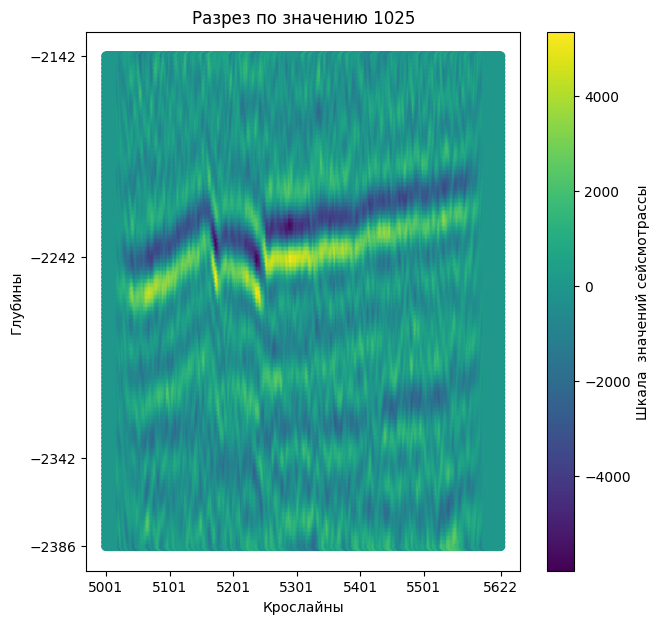

In [16]:
#Выбираем нужную координату Х (инлайн) и строим разрез по ней. Т.к. точек слишком много, то вывели только одну для примера
X = 1025
map_xlines_samples = {}
for i in range(len(xlines)):
    for j in range(len(samples)):
        map_xlines_samples[f"{xlines[i]}_{samples[j]}"] = traces[f"{X}_{xlines[i]}"][j]
points = []
values = []
for coord_str, value in map_xlines_samples.items():
    x, y = map(int, coord_str.split('_'))
    points.append((x, y * (-1)))
    values.append(value)

plt.figure(figsize=(7, 7))
scatter = plt.scatter(x=list(zip(*points))[0], y=list(zip(*points))[1], c=values)
plt.xticks([xlines[0], xlines[100], xlines[200], xlines[300], xlines[400], xlines[500], xlines[-1]])
plt.yticks([(-1)*samples[0], (-1)*samples[50], (-1)*samples[100], (-1)*samples[-1]])
plt.xlabel('Крослайны')
plt.ylabel('Глубины')
plt.title(f"Разрез по значению {X}")
plt.colorbar(scatter, label='Шкала  значений сейсмотрассы')


plt.grid(False)  # Отключение сетки
plt.show()


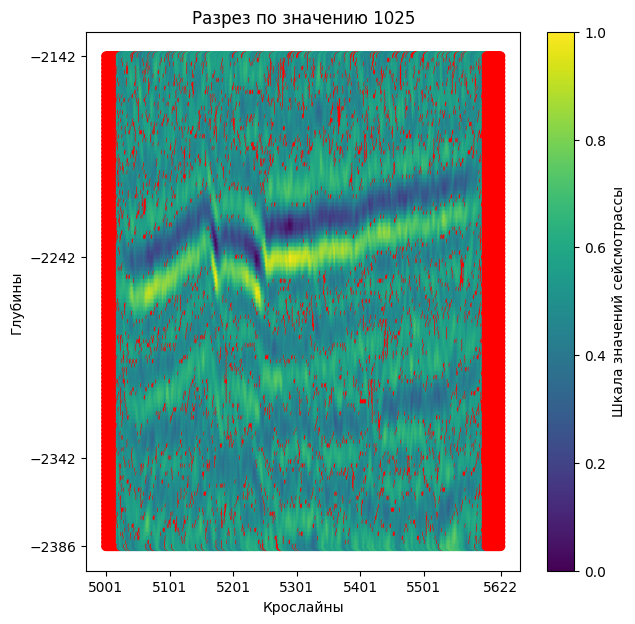

In [17]:
# добавлено условие, чтобы все нулевые значения на разрезе были красными
X = 1025
map_xlines_samples = {}
for i in range(len(xlines)):
    for j in range(len(samples)):
        map_xlines_samples[f"{xlines[i]}_{samples[j]}"] = traces[f"{X}_{xlines[i]}"][j]

points = []
values = []
for coord_str, value in map_xlines_samples.items():
    x, y = map(int, coord_str.split('_'))
    points.append((x, y * (-1)))
    values.append(value)

points = np.array(points)
values = np.array(values)

# Создаем массив цветов, где по умолчанию все цвета из шкалы значений
colors = plt.cm.viridis((values - np.min(values)) / (np.max(values) - np.min(values)))

# Меняем цвет на красный для значений, равных 0
colors[values == 0] = [1, 0, 0, 1]  # RGBA для красного цвета

plt.figure(figsize=(7, 7))
scatter = plt.scatter(x=points[:, 0], y=points[:, 1], c=colors)
plt.xticks([xlines[0], xlines[100], xlines[200], xlines[300], xlines[400], xlines[500], xlines[-1]])
plt.yticks([(-1)*samples[0], (-1)*samples[50], (-1)*samples[100], (-1)*samples[-1]])
plt.xlabel('Крослайны')
plt.ylabel('Глубины')
plt.title(f"Разрез по значению {X}")
plt.colorbar(scatter, label='Шкала значений сейсмотрассы')

plt.grid(False)  # Отключение сетки
plt.show()
